In [1]:
!pip install matplotlib deap

In [2]:
import numpy as np
import random
import matplotlib.pyplot as plt
from deap import base, creator, tools, algorithms

In [3]:
def generate_random_coordinates(num_points):
    coordinates = [(random.randint(0, 100), random.randint(0, 100)) for _ in range(num_points)]
    return coordinates

# Example usage
num_points = 10  # You can change this number to generate more or fewer points
random_coordinates = generate_random_coordinates(num_points)
print(random_coordinates)

[(65, 51), (64, 31), (54, 27), (94, 100), (24, 19), (79, 16), (54, 75), (23, 42), (73, 87), (93, 2)]


In [4]:
num_locations = 25 # Define the number of locations (eg 10)
locations = generate_random_coordinates(num_locations)  # Create a list of tuples representing location coordinates -
depot = (random.randint(105,120),random.randint(105,120))  # Define the coordinates for the depot
num_vehicles = 5  # Define the number of vehicles - (eg 3)

In [5]:
# Genetic Algorithm Setup
creator.create("FitnessMin", base.Fitness, weights=(-1.0,-1.0))
creator.create("Individual", list, fitness=creator.FitnessMin)

In [6]:
toolbox = base.Toolbox()
toolbox.register("indices", random.sample, range(num_locations), num_locations)
toolbox.register("individual", tools.initIterate, creator.Individual, toolbox.indices)
toolbox.register("population", tools.initRepeat, list, toolbox.individual)

In [7]:
# Fitness Function
def evalVRP(individual):
    distances = [0] * num_vehicles
    routes = [[depot] for _ in range(num_vehicles) ]
    prev = [depot for _ in range(num_vehicles)]
    #print(individual)
    for ind in range(len(individual)):
      distances[ind%num_vehicles] = distances[ind%num_vehicles] + np.sqrt((locations[individual[ind]][0] - prev[ind%num_vehicles][0])**2 + (locations[individual[ind]][1] - prev[ind%num_vehicles][1])**2)
      prev[ind%num_vehicles] = locations[individual[ind]]
      routes[ind%num_vehicles].append(locations[individual[ind]])
    for vehicle in range(num_vehicles):
      distances[vehicle] += np.sqrt((depot[0] - prev[vehicle][0])**2 + (depot[1] - prev[vehicle][1])**2)
      routes[vehicle].append(depot)
    total_distance = 0
    for distance in distances:
      total_distance += distance
    std_dev = 0
    std_dev = np.std(distances)
    #print(distances)
    #print(total_distance)
    #print(std_dev)
    #print(routes)
    return total_distance, std_dev
toolbox.register("evaluate", evalVRP)

In [13]:
lst = [0, 2, 4, 6, 7, 8, 9, 1, 3, 5]
print(lst)
evalVRP(lst)

[0, 2, 4, 6, 7, 8, 9, 1, 3, 5]


(945.4993337239447, 55.11575443812692)

In [8]:
toolbox.register("mate", tools.cxPartialyMatched)
toolbox.register("mutate", tools.mutShuffleIndexes, indpb=0.05)
toolbox.register("select", tools.selTournament, tournsize=3)

In [9]:
# Plotting Function
def plot_routes(individual, title="Routes"):
    plt.figure()
    # Plot locations as blue dots and the depot as a red square
    for (x, y) in locations:
        plt.plot(x, y, 'bo')
    plt.plot(depot[0], depot[1], 'rs')

    for i in range(num_vehicles):
        vehicle_route = [depot] + [locations[individual[j]] for j in range(i, len(individual), num_vehicles)] + [depot]
        plt.plot(*zip(*vehicle_route), '-')

    plt.title(title)
    plt.xlabel('X Coordinate')
    plt.ylabel('Y Coordinate')
    plt.show()
    #HINT: Refer to the Maze Solver in terms of how to plot and display. OR refer Pyplot docs - https://matplotlib.org/stable/tutorials/pyplot.html


gen	nevals	avg    	min    
0  	300   	977.758	6.75272
1  	221   	938.108	10.9823
2  	234   	922.271	14.4031
3  	229   	902.561	15.0992
4  	222   	890.069	11.7458
5  	218   	880.329	7.08808
6  	236   	876.774	11.3964
7  	239   	865.973	11.3964
8  	242   	858.56 	8.40305
9  	226   	847.082	9.13286
10 	230   	840.566	6.81592
11 	237   	838.346	6.81592
12 	217   	828.873	9.38721
13 	234   	821.4  	11.5154
14 	222   	806.131	5.79991
15 	226   	800.821	8.92639
16 	218   	796.068	8.92639
17 	232   	789.176	10.5677
18 	232   	791.162	9.43481
19 	223   	792.63 	14.6376
20 	222   	785.174	9.36222
21 	224   	777.951	9.03758
22 	228   	766.239	9.36222
23 	228   	758.416	12.1269
24 	253   	752.491	10.9294
25 	213   	742.473	12.3505
26 	211   	734.414	14.1333
27 	233   	735.222	15.4088
28 	217   	726.026	6.45044
29 	245   	723.957	13.6865
30 	221   	715.523	11.6508
31 	246   	720.158	13.5938
32 	233   	707.729	11.9996
33 	228   	707.479	15.3188
34 	235   	697.125	13.9536
35 	240   	701.753	16.5706
3

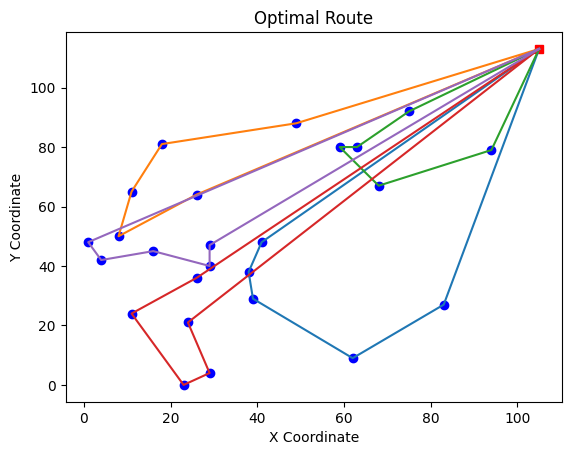

In [10]:
# Running the Genetic Algorithm
def main():
    random.seed(42)  # Seed for reproducibility
    pop = toolbox.population(n=300)  # Generate initial population
    hof = tools.HallOfFame(1)  # Hall of Fame to store the best individual

    stats = tools.Statistics(lambda ind: ind.fitness.values)
    stats.register("avg", np.mean)
    stats.register("min", np.min)

    algorithms.eaSimple(pop, toolbox, 0.7, 0.2, 300, stats=stats, halloffame=hof)

    plot_routes(hof[0], "Optimal Route")
    return pop, stats, hof

if __name__ == "__main__":
    main()
    # TODO: Task 6 - Call the main function, run the algorithm and print the results

gen	nevals	avg    	min    
0  	300   	977.758	6.75272
1  	221   	938.108	10.9823
gen	nevals	avg    	min    
0  	0     	938.108	10.9823
1  	234   	922.271	14.4031
gen	nevals	avg    	min    
0  	0     	922.271	14.4031
1  	229   	902.561	15.0992
gen	nevals	avg    	min    
0  	0     	902.561	15.0992
1  	222   	890.069	11.7458
gen	nevals	avg    	min    
0  	0     	890.069	11.7458
1  	218   	880.329	7.08808
gen	nevals	avg    	min    
0  	0     	880.329	7.08808
1  	236   	876.774	11.3964
gen	nevals	avg    	min    
0  	0     	876.774	11.3964
1  	239   	865.973	11.3964
gen	nevals	avg    	min    
0  	0     	865.973	11.3964
1  	242   	858.56 	8.40305
gen	nevals	avg   	min    
0  	0     	858.56	8.40305
1  	226   	847.082	9.13286
gen	nevals	avg    	min    
0  	0     	847.082	9.13286
1  	230   	840.566	6.81592
gen	nevals	avg    	min    
0  	0     	840.566	6.81592
1  	237   	838.346	6.81592
gen	nevals	avg    	min    
0  	0     	838.346	6.81592
1  	217   	828.873	9.38721
gen	nevals	avg    	min    
0  

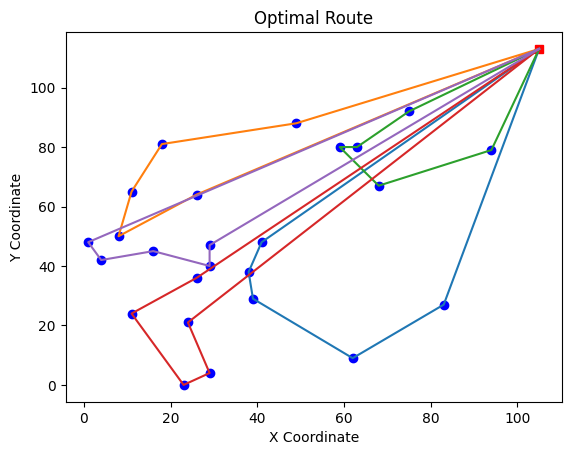

In [11]:

random.seed(42)

pop = toolbox.population(n=300)
hof = tools.HallOfFame(1)

# Setup statistics to track
stats = tools.Statistics(lambda ind: ind.fitness.values)
stats.register("avg", np.mean)
stats.register("min", np.min)

best_individuals = []

def record_best_individual(population):
    best_individual = tools.selBest(population, 1)[0]
    best_individuals.append(best_individual)

# Run the genetic algorithm
for gen in range(300):
    pop, logbook = algorithms.eaSimple(pop, toolbox, 0.7, 0.2, 1, stats=stats, halloffame=hof)
    record_best_individual(pop)

# Plot the best route found
plot_routes(hof[0], "Optimal Route")

# You can also return the list of best individuals if needed

300


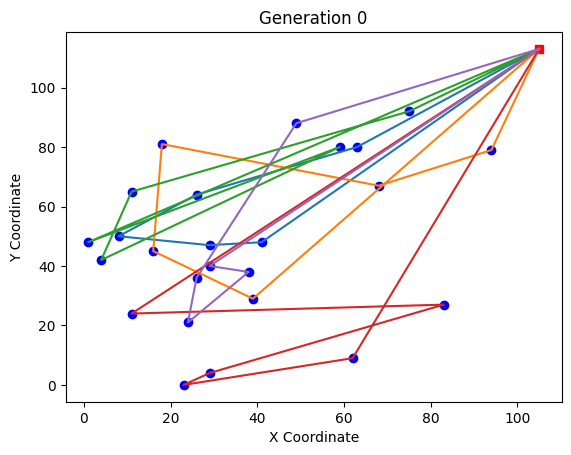

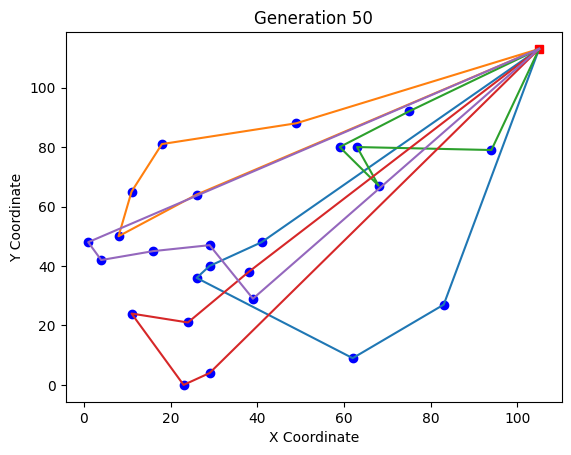

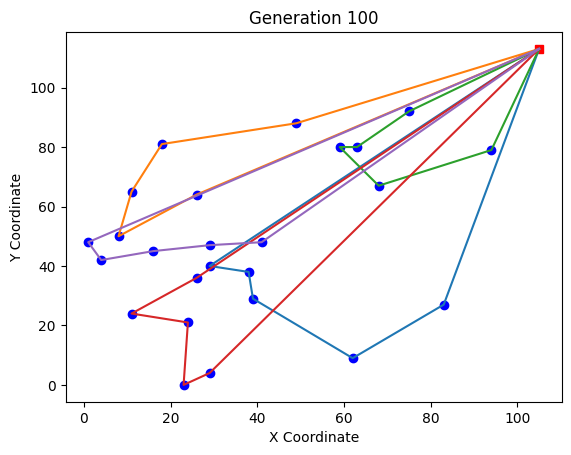

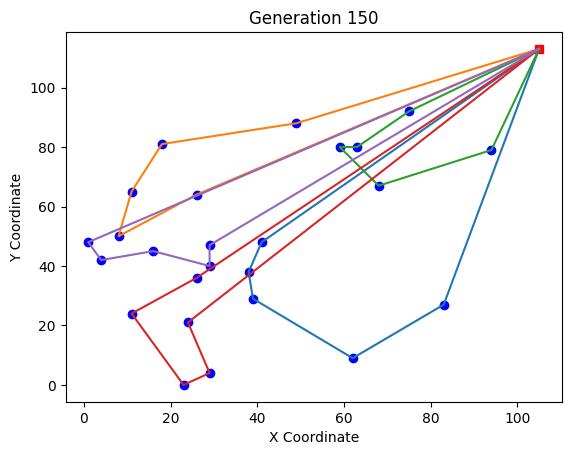

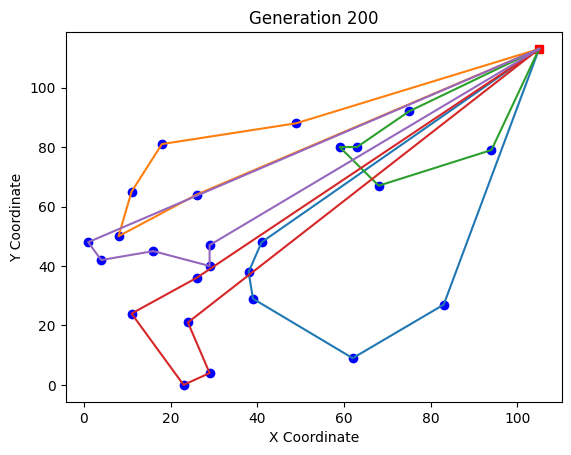

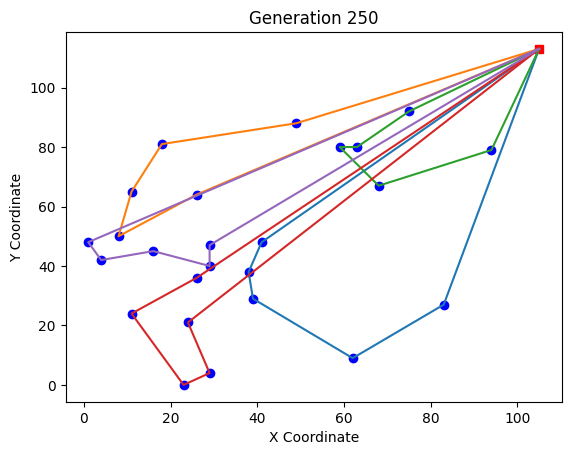

In [24]:
i = 0
best_fitness_values = []
standard_deviation = []
print(len(best_individuals))
for individual in best_individuals:
    best_fitness_values.append(individual.fitness.values[0])
    standard_deviation.append(individual.fitness.values[1])
    if i%50==0:
       plot_routes(individual, f"Generation {i}")
    i += 1
#print(best_fitness_values)

In [22]:
print(best_fitness_values)

[1603.976692317404, 1499.2773595310002, 1477.0059149366011, 1477.0059149366011, 1470.1606643620107, 1461.3910322112606, 1429.7421906131756, 1440.7378881285085, 1424.1246552059565, 1417.6454499503957, 1441.811555604791, 1431.2302625485231, 1401.4983415871022, 1389.7394041034904, 1414.871769192286, 1414.714426362064, 1329.0234604125808, 1329.0234604125808, 1386.577109753907, 1378.0823719080126, 1378.0823719080126, 1345.3914261931927, 1330.8360002058462, 1330.8360002058462, 1339.1786642308703, 1326.2867913411585, 1326.2867913411585, 1313.2293758703051, 1313.2293758703051, 1313.2293758703051, 1313.2293758703051, 1313.2293758703051, 1313.2293758703051, 1311.8348954063515, 1302.185818262913, 1302.185818262913, 1311.209559343031, 1309.2824695381767, 1308.6571334748562, 1302.9228621079412, 1292.2983701320281, 1292.2983701320281, 1292.2983701320281, 1292.2983701320281, 1292.2983701320281, 1285.504217888634, 1285.504217888634, 1263.3546226225046, 1257.025952663673, 1257.025952663673, 1251.961859

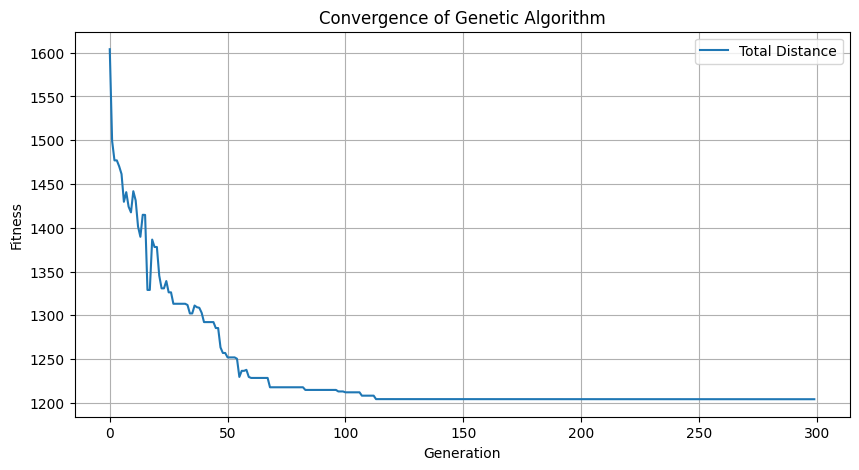

In [25]:
plt.figure(figsize=(10, 5))
plt.plot(best_fitness_values, label="Total Distance")
plt.xlabel("Generation")
plt.ylabel("Fitness")
plt.title("Convergence of Genetic Algorithm")
plt.legend()
plt.grid(True)
plt.show()

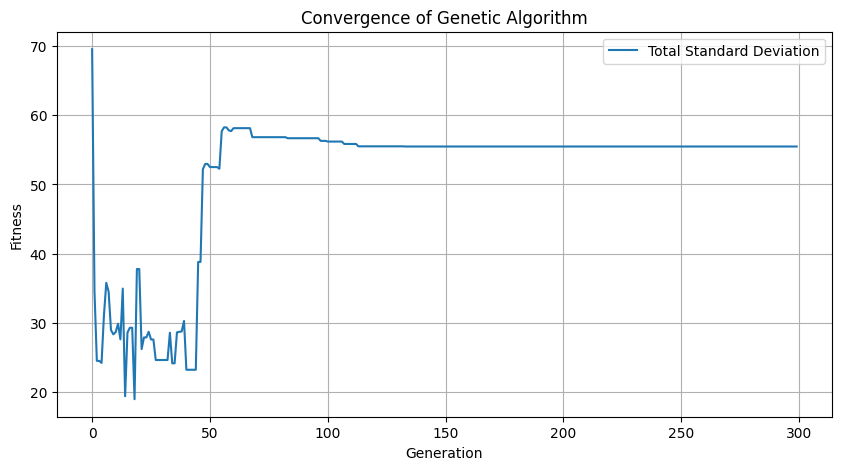

In [26]:
plt.figure(figsize=(10, 5))
plt.plot(standard_deviation, label="Total Standard Deviation")
plt.xlabel("Generation")
plt.ylabel("Fitness")
plt.title("Convergence of Genetic Algorithm")
plt.legend()
plt.grid(True)
plt.show()